In [3]:
from IPython.display import Image

# Detecção de anomalias

## DB Outliers

### Outlier (valores extremos)

Um outlier é um fato que desvia tanto de outros fatos a ponto de gerar suspeita de que foi gerado por um mecanismo diferente.

A identificação de outliers pode levar à descoberta de conhecimento inesperado em aplicação como:

* Fraude de telecomunicação

* Fraude em cartão de crédito

* Segmentação de clientes

* Performance de atletas profissionais (caso de dopagem, por exemplo).

Definição:

Um objeto $O$ de um banco de dados $D$ é dito um $DB(p,d)-outlier$ se pelo menos uma fração $p (0 < p < 1)$ dos objetos de $D$ estão a uma distância maior do que $d$ de $O$.

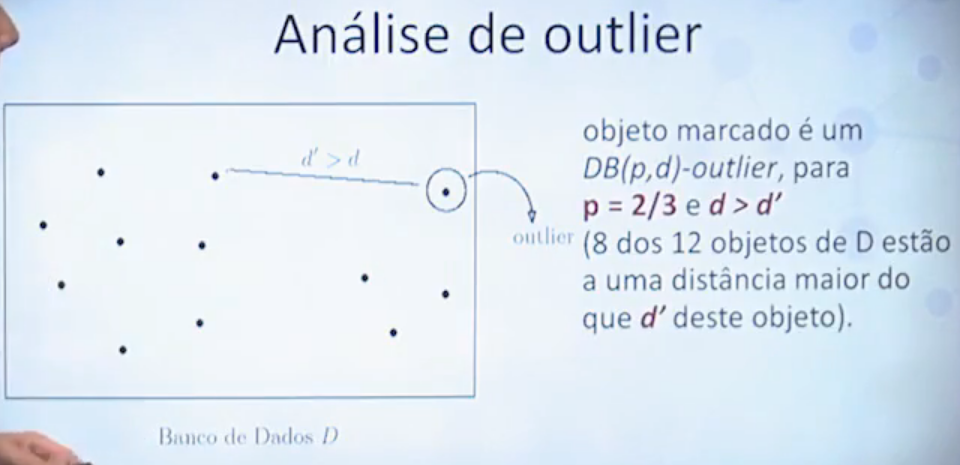

In [4]:
Image('Imagens/Imagem0001.png')

* Sejam uma base $D$ com $N$ elementos, $p$ um número entre 0 e 1 e $d$ > 0.

* Considere $dist()$ a função distância considerada.

* $d-vizinhança(O)$ é o conjunto de pontos cuja distâncias a $O$ são no máximo $d$.

* $p$ é a fração mínima de objetos de $D$ que devem ficar fora da $d-vizinhança$ de um outlier.

* O número máximo de objetos dentro da vizinhança de um outlier, $M$ é: $M = N(1-p)$.

* $p$ é a fração mínima de objetos de $D$ que devem ficar fora da $d-vizinhança$ de um outlier.

* O número máximo de objetos dentro da vizinhança de um outlier, $M$ é: $M = N(1-p)$


### Processo

Encontrar todos os DB(p;d)-outliers se reduz a encontrar, para cada objeto $O$ de $D$, uma vizinhança contendo no máximo $M$ elementos.

* Executa-se uma busca dentro de um raio $d$ para cada objeto $O$.

* Se $M+1$ elementos são encontrados nesta vizinhança, a busca termina e $O$ é declarado um não-outlier. Os objetos que sobram são os outliers.

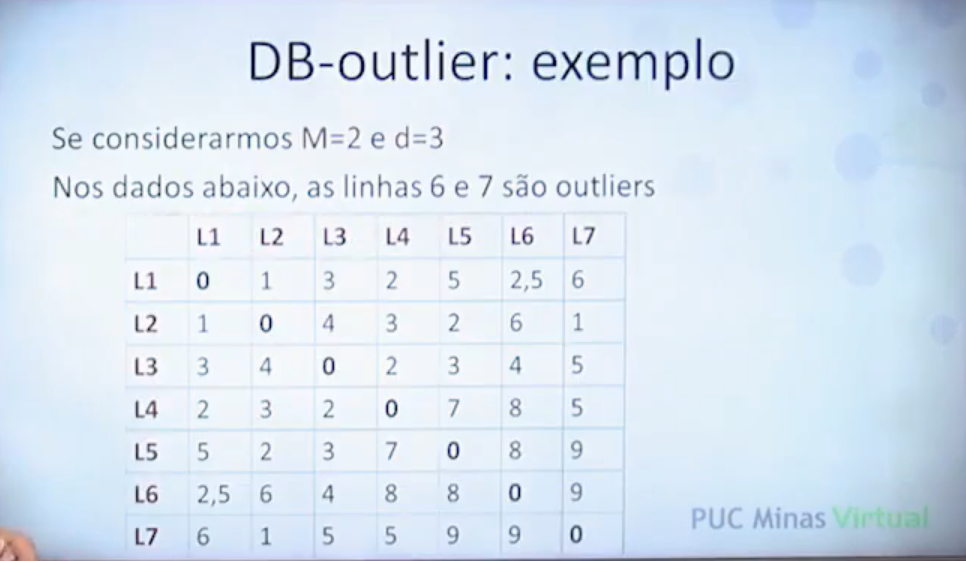

In [5]:
Image('Imagens/Imagem0002.png')

In [15]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd

elementos = np.array([130,132,138,136,131,153,131,133,129,133,110,132,129,134,135,132,135,134,133,132,130,131,134,135,135,134,136,133,133,130])

out = LocalOutlierFactor(n_neighbors=10)
predict = out.fit_predict(elementos.reshape(-1,1))

df = pd.DataFrame(np.c_[elementos, predict], columns=['Alturas', 'Outliers'])
df.replace({-1:'Sim', 1: 'Nao'}, inplace=True)
df.query("Outliers == 'Sim'")

,Alturas,Outliers
2,138,Sim
5,153,Sim
10,110,Sim


In [16]:
import matplotlib.pyplot as plt

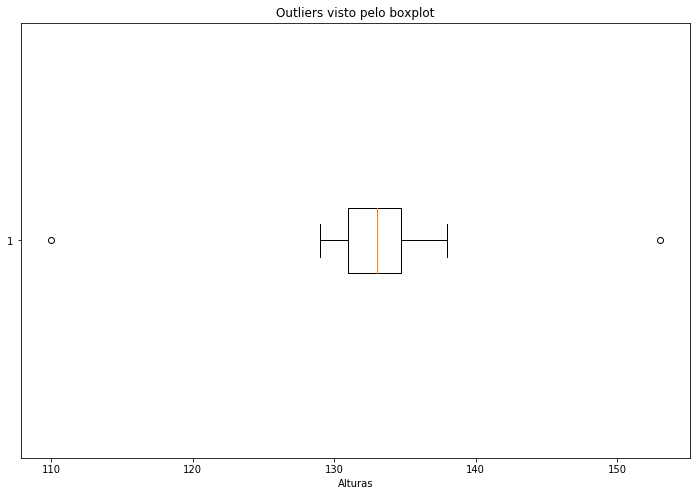

In [20]:
plt.figure(figsize=(12,8))
plt.boxplot(elementos, vert=False)
plt.title("Outliers visto pelo boxplot")
plt.xlabel("Alturas")
plt.show()